In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost
import evaluate
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
dataset.shape

(1470, 35)

1470 datapoints

In [4]:
dataset.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [5]:
dataset.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

All false indicating no null values

In [6]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

All false indicating no duplicate values 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

<AxesSubplot:xlabel='Attrition', ylabel='count'>

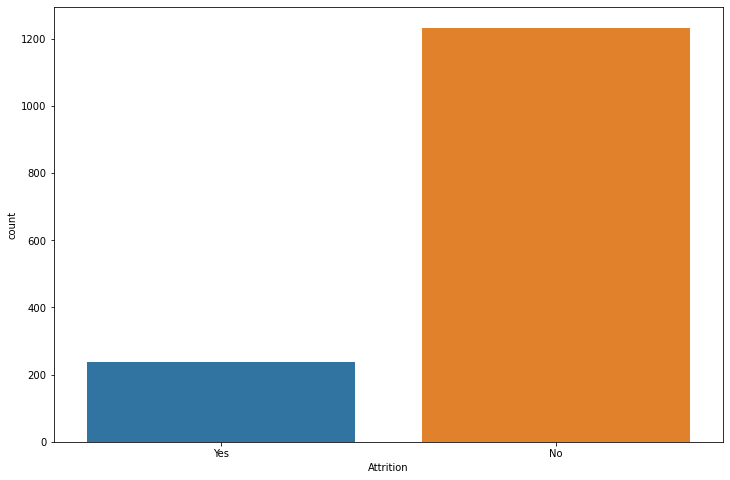

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Attrition', data=dataset)

This bar plot shows the data is imbalanced. 

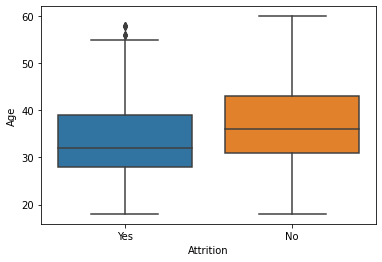

In [9]:
sns.boxplot(y='Age', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in the the yes category of age

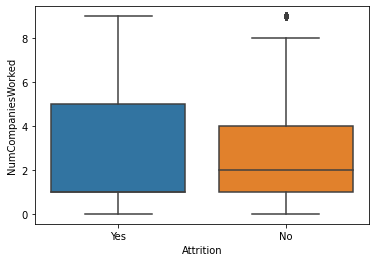

In [10]:
sns.boxplot(y='NumCompaniesWorked', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in the the no category of Num of Companies Worked for

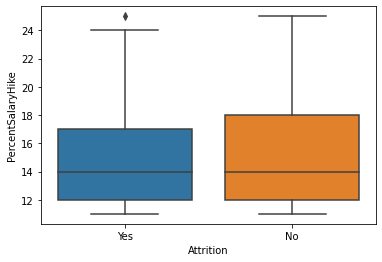

In [11]:
sns.boxplot(y='PercentSalaryHike', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in the the yes category of salary hike percentage

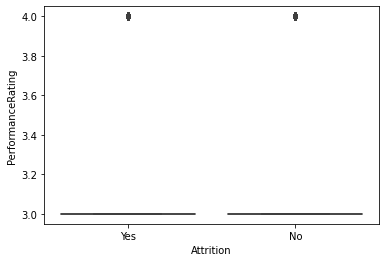

In [12]:
sns.boxplot(y='PerformanceRating', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of performance rating

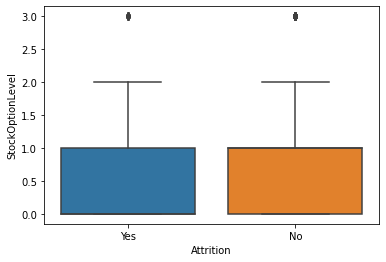

In [13]:
sns.boxplot(y='StockOptionLevel', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in  both categories of Stock Optional Level

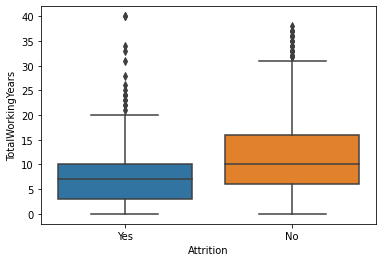

In [14]:
sns.boxplot(y='TotalWorkingYears', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of total working years

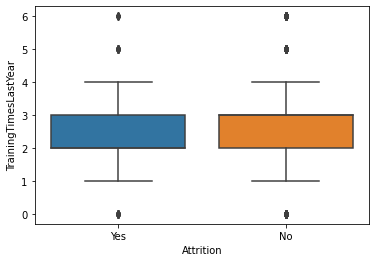

In [15]:
sns.boxplot(y='TrainingTimesLastYear', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of last year's training times

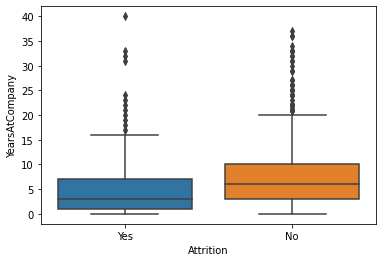

In [16]:
sns.boxplot(y='YearsAtCompany', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of years at company

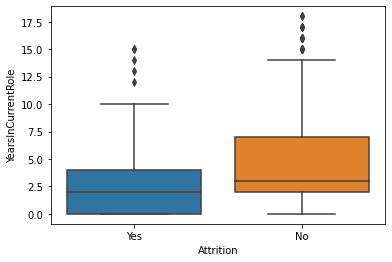

In [17]:
sns.boxplot(y='YearsInCurrentRole', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of year's in current role

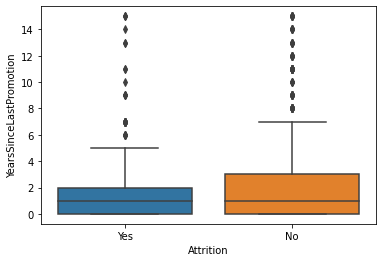

In [18]:
sns.boxplot(y='YearsSinceLastPromotion', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of years since last promotion

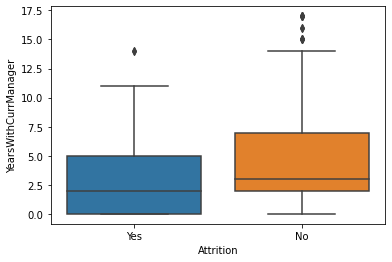

In [19]:
sns.boxplot(y='YearsWithCurrManager', x='Attrition', data=dataset)
plt.show()

In the boxplot above there are outliers in both categories of years with current manager

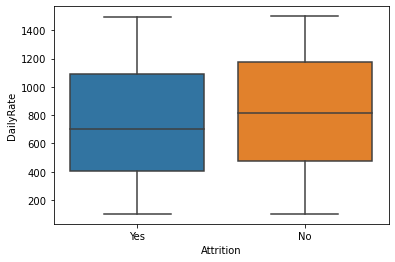

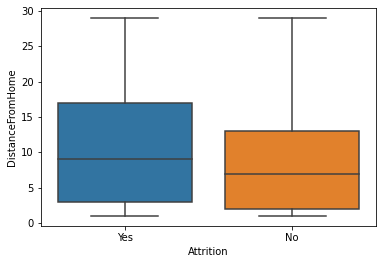

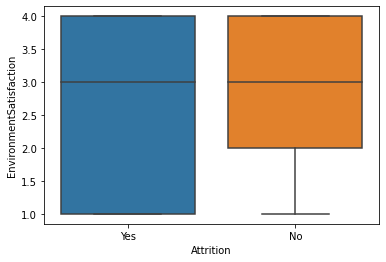

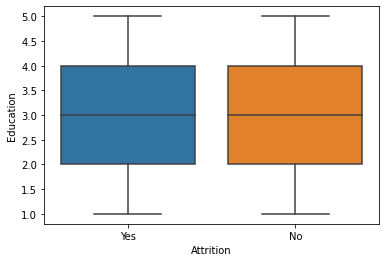

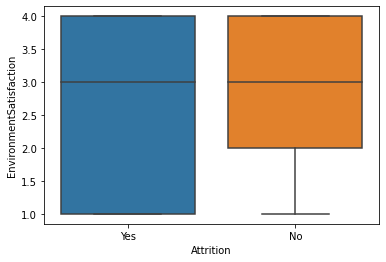

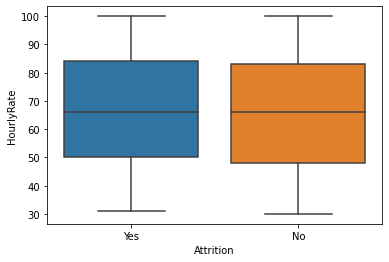

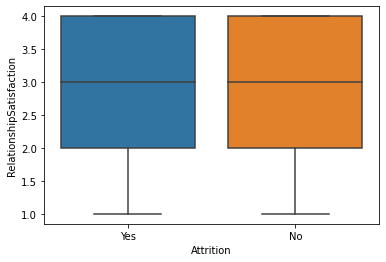

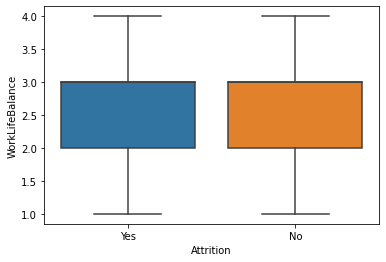

In [20]:
sns.boxplot(y='DailyRate', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='DistanceFromHome', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='EnvironmentSatisfaction', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='Education', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='EnvironmentSatisfaction', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='HourlyRate', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='RelationshipSatisfaction', x='Attrition', data=dataset)
plt.show()
sns.boxplot(y='WorkLifeBalance', x='Attrition', data=dataset)
plt.show()


Follwing boxplots above indicate no outliers 

<AxesSubplot:xlabel='Department', ylabel='count'>

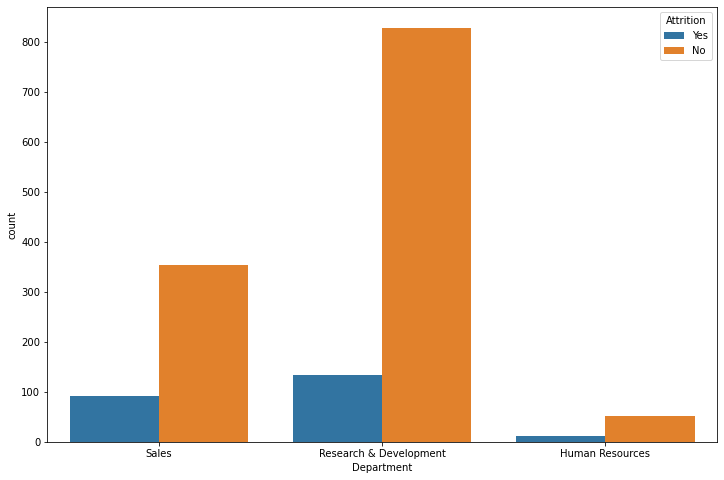

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='Department', hue='Attrition', data=dataset)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

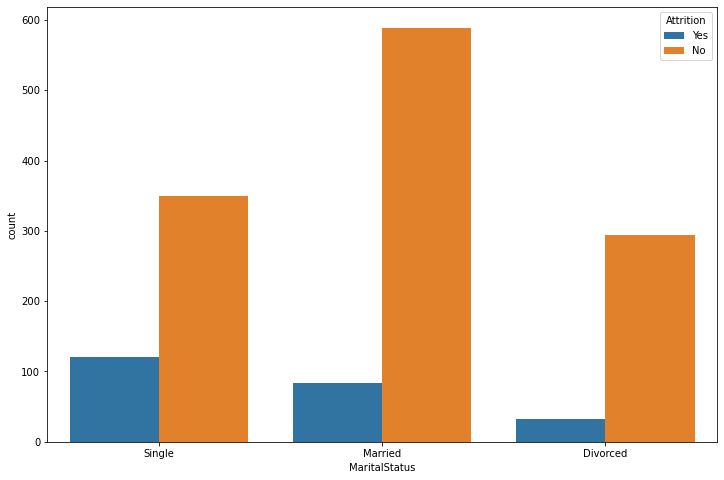

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='MaritalStatus', hue='Attrition', data=dataset)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

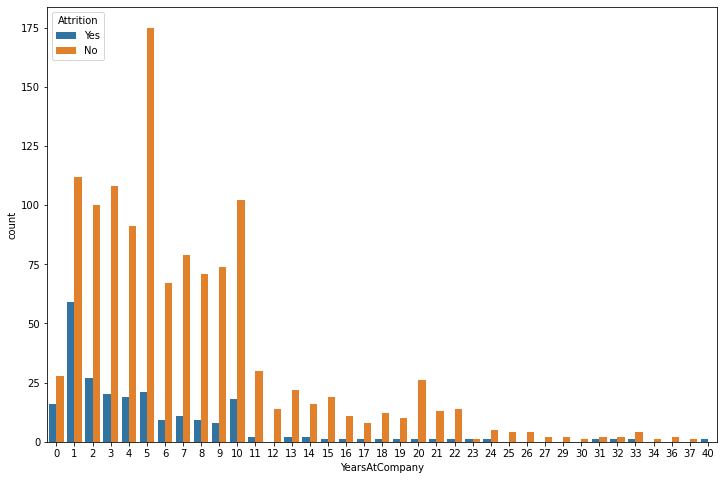

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=dataset)

The boxplot above shows attrition based on years at the company. 

Text(0, 0.5, 'Monthly Income')

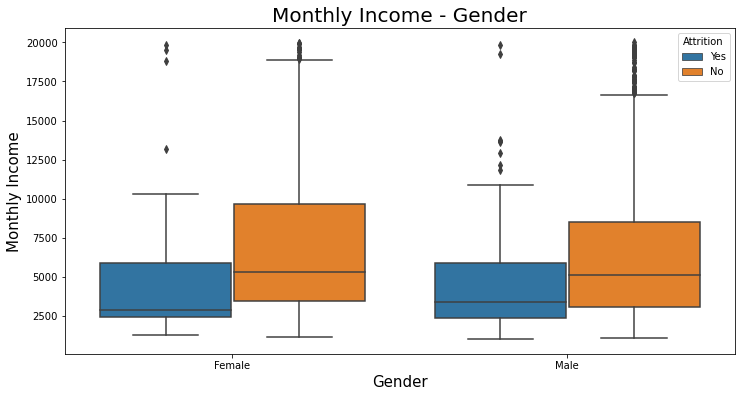

In [24]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x="Gender",y="MonthlyIncome",data=dataset, hue="Attrition")
plt.title("Monthly Income - Gender", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Monthly Income", fontsize=15)

The plot above compares males and females attrition based on monthly income with both genders facing outliers in 
both categories of attrition. 

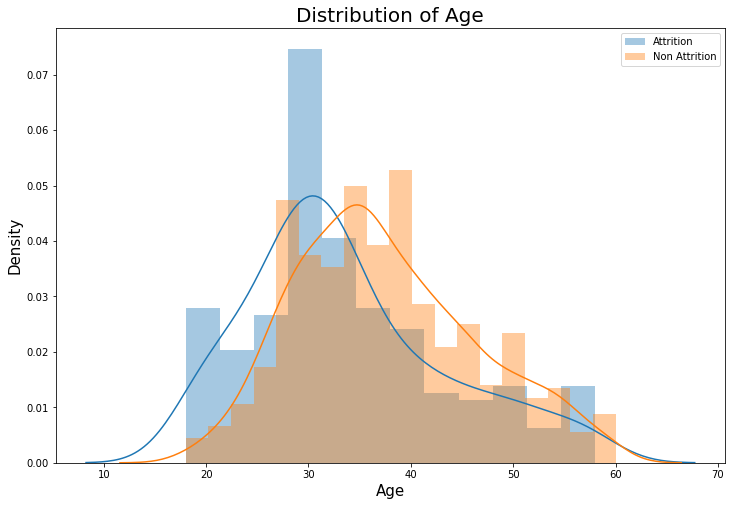

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(dataset[dataset['Attrition'] == 'Yes']['Age'], label='Attrition')
sns.distplot(dataset[dataset['Attrition'] == 'No']['Age'], label='Non Attrition')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Age',fontsize=20);
plt.legend()

The plot above shows attrition distribution based upon age of an employee.

In [26]:
dataset_tar= dataset.drop(['Attrition'], axis=1)

In [27]:
y=dataset['Attrition']

In [67]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
x_train, x_test, y_train, y_test = train_test_split(dataset_tar, 
                                                         y,
                                                         train_size= 0.80,
                                                         random_state=0);

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 30)
(1176,)
(294, 30)
(294,)


In [69]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target

In [70]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [71]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [72]:
x_test_encode=encoding(x_test)
x_train_encode=encoding(x_train)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [73]:
x_train_encode

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1374,58,605,21,3,4,72,3,4,4,17875,...,0,0,0,0,0,0,1,0,0,1
1092,45,950,28,3,4,97,3,1,4,2132,...,0,0,1,0,0,0,1,0,1,0
768,40,300,26,3,3,74,3,2,1,8396,...,0,0,0,1,0,0,1,0,1,0
569,36,1434,8,4,1,76,2,3,1,7587,...,0,0,0,1,0,0,0,1,1,0
911,25,599,24,1,3,73,1,1,4,1118,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,10,4,3,87,3,1,3,2220,...,0,0,0,0,1,0,1,0,0,1
835,35,528,8,4,3,100,3,1,3,4323,...,0,0,0,0,0,0,0,1,1,0
1216,43,1179,2,3,4,73,3,2,4,7847,...,0,0,0,1,0,0,1,0,0,1
559,38,268,2,5,4,92,3,1,3,3057,...,0,0,1,0,0,0,1,0,0,1


Encodes Data

In [74]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)
x_res=x_test_encode
y_res=y_test_encode

In [75]:
smote_train.shape
smote_target.shape
x_res.shape
y_res.shape

(294,)

Random Forrest Classifier

In [76]:
seed = 0   # We set our random seed to zero for reproducibility

In [77]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [78]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [79]:
rf_predictions = rf.predict(x_res)
print("Predictions finished")

Predictions finished


In [80]:

print("Accuracy score: {}".format(accuracy_score(y_res, rf_predictions)))
print("="*80)
print(classification_report_imbalanced(y_res, rf_predictions))

Accuracy score: 0.8435374149659864
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.93      0.43      0.91      0.63      0.42       245
          1       0.54      0.43      0.93      0.48      0.63      0.38        49

avg / total       0.83      0.84      0.51      0.84      0.63      0.41       294



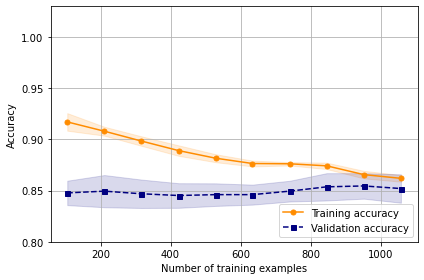

In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf,
                               X=x_train_encode,
                               y=y_train_encode,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

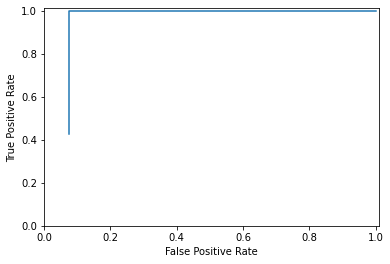

f Area Under Curve:  0.6775510204081633


In [82]:
import numpy as np
from sklearn import metrics
def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Hint: create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))
        # YOUR CODE
        
        positive_predictions = (binarized_scores == pos_label)
        
        true_positives = (y_true[positive_predictions]== pos_label).sum() # YOUR CODE
        false_positives = (y_true[positive_predictions]!= pos_label).sum()# YOUR CODE
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None
plot_roc_curve(y_res,rf_predictions, pos_label=1)
plt.show()
auc = metrics.roc_auc_score(y_res,rf_predictions)
print('f Area Under Curve: ', auc)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced 

print(f'Confusion Matrix: \n' ,confusion_matrix(y_res,rf_predictions))
print(f'True Positives: ' ,confusion_matrix(y_res,rf_predictions)[0][0] )
print(f'False Positives: ' ,confusion_matrix(y_res,rf_predictions)[0][1] )
print(f'False Negatives: ' ,confusion_matrix(y_res,rf_predictions)[1][0] )
print(f'True Negatives: ' ,confusion_matrix(y_res,rf_predictions)[1][1] )

Confusion Matrix: 
 [[227  18]
 [ 28  21]]
True Positives:  227
False Positives:  18
False Negatives:  28
True Negatives:  21


Grad Boosting

In [84]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [85]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_res)
print(accuracy_score(y_res, gb_predictions))
print("="*80)
print(classification_report_imbalanced(y_res, gb_predictions))

0.8707482993197279
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.97      0.37      0.93      0.60      0.38       245
          1       0.72      0.37      0.97      0.49      0.60      0.34        49

avg / total       0.86      0.87      0.47      0.85      0.60      0.37       294



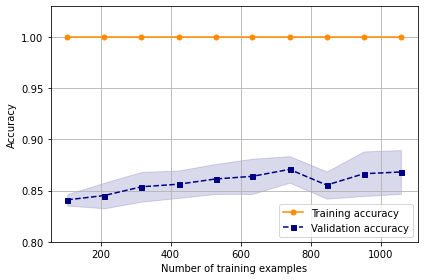

In [86]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=gb,
                               X=x_train_encode,
                               y=y_train_encode,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

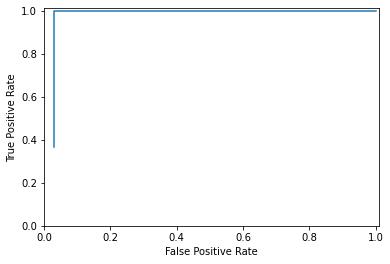

f Area Under Curve:  0.6693877551020407


In [87]:
import numpy as np
from sklearn import metrics
def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Hint: create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))
        # YOUR CODE
        
        positive_predictions = (binarized_scores == pos_label)
        
        true_positives = (y_true[positive_predictions]== pos_label).sum() # YOUR CODE
        false_positives = (y_true[positive_predictions]!= pos_label).sum()# YOUR CODE
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None
plot_roc_curve(y_res,gb_predictions, pos_label=1)
plt.show()
auc = metrics.roc_auc_score(y_res,gb_predictions)
print('f Area Under Curve: ', auc)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced 

print(f'Confusion Matrix: \n' ,confusion_matrix(y_res,gb_predictions))
print(f'True Positives: ' ,confusion_matrix(y_res,gb_predictions)[0][0] )
print(f'False Positives: ' ,confusion_matrix(y_res,gb_predictions)[0][1] )
print(f'False Negatives: ' ,confusion_matrix(y_res,gb_predictions)[1][0] )
print(f'True Negatives: ' ,confusion_matrix(y_res,gb_predictions)[1][1] )

Confusion Matrix: 
 [[238   7]
 [ 31  18]]
True Positives:  238
False Positives:  7
False Negatives:  31
True Negatives:  18


KNN

In [89]:
knn_params ={
    'kneighborsclassifier__n_nieghbors':[1,3,5],
    'kneighborsclassifier__p': [1,2]   
}

In [90]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)) 
# Fit the model to our SMOTEd train and target
knn.fit(smote_train, smote_target)
# Get our predictions
knn_predictions = knn.predict(x_res)
print(accuracy_score(y_res, knn_predictions))
print("=")
print(classification_report_imbalanced(y_res, knn_predictions))

0.8299319727891157
=
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.92      0.37      0.90      0.58      0.36       245
          1       0.49      0.37      0.92      0.42      0.58      0.32        49

avg / total       0.81      0.83      0.46      0.82      0.58      0.35       294



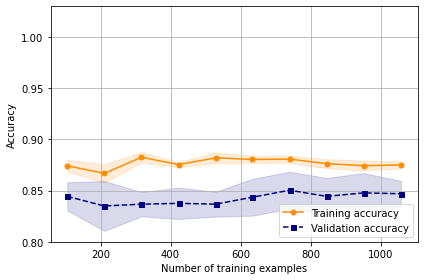

In [91]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn,
                               X=x_train_encode,
                               y=y_train_encode,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()


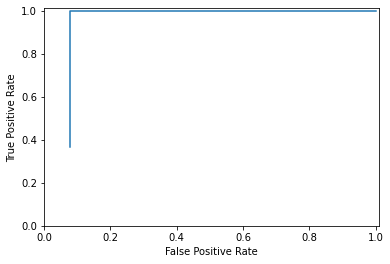

f Area Under Curve:  0.6448979591836734


In [92]:
import numpy as np
from sklearn import metrics
def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Hint: create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))
        # YOUR CODE
        
        positive_predictions = (binarized_scores == pos_label)
        
        true_positives = (y_true[positive_predictions]== pos_label).sum() # YOUR CODE
        false_positives = (y_true[positive_predictions]!= pos_label).sum()# YOUR CODE
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None
plot_roc_curve(y_res,knn_predictions, pos_label=1)
plt.show()
auc = metrics.roc_auc_score(y_res,knn_predictions)
print('f Area Under Curve: ', auc)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced 

print(f'Confusion Matrix: \n' ,confusion_matrix(y_res,knn_predictions))
print(f'True Positives: ' ,confusion_matrix(y_res,knn_predictions)[0][0] )
print(f'False Positives: ' ,confusion_matrix(y_res,knn_predictions)[0][1] )
print(f'False Negatives: ' ,confusion_matrix(y_res,knn_predictions)[1][0] )
print(f'True Negatives: ' ,confusion_matrix(y_res,knn_predictions)[1][1] )

Confusion Matrix: 
 [[226  19]
 [ 31  18]]
True Positives:  226
False Positives:  19
False Negatives:  31
True Negatives:  18


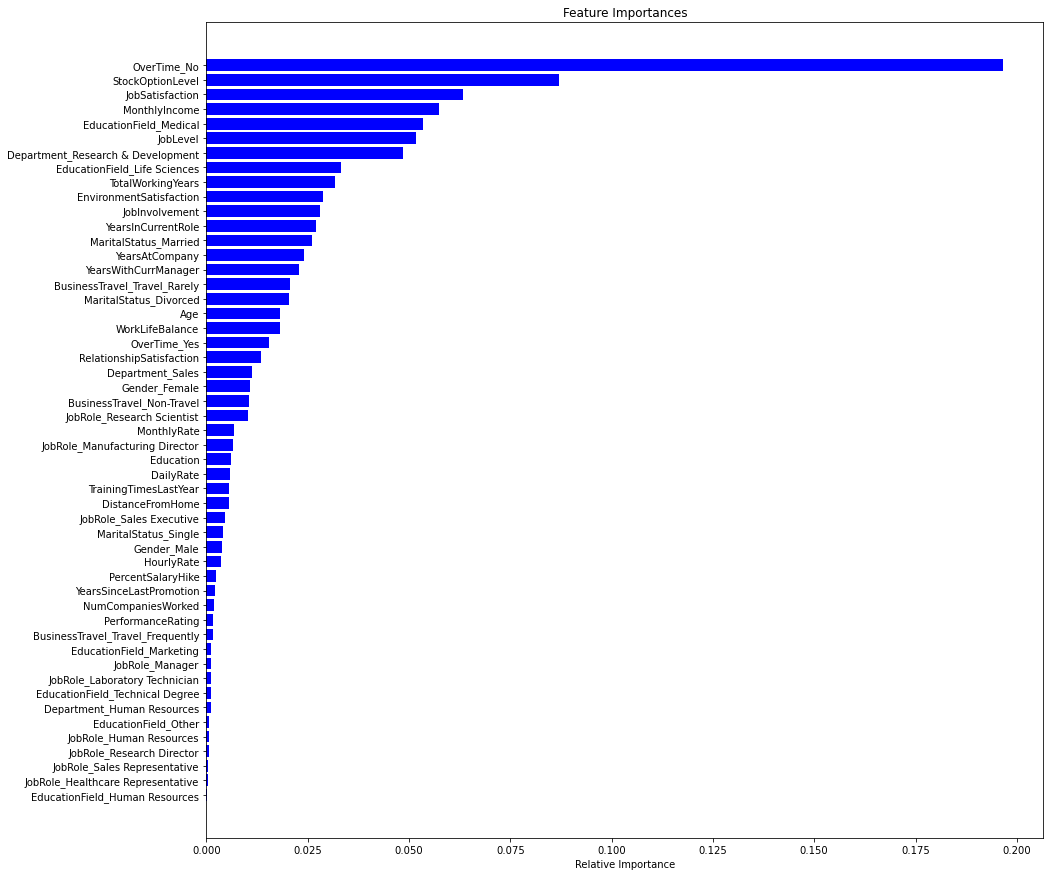

In [94]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()